In [3]:
%pylab inline
from pandas import *
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
#BOF
import math
def dist(A,B):
    sum = 0
    for i in range(len(A)):
        sum += (A[i] - B[i])**2
    return math.sqrt(sum)

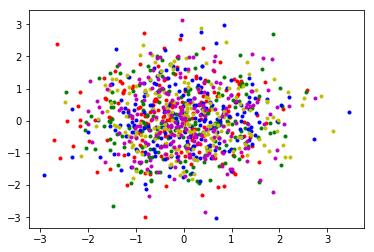

In [5]:
#BOF
def generateTable(columnNames,length, K):
    Table = DataFrame()
    #table = DataFrame(random.normal(0,100,size=(int(length), int(len(columnNames)))), columns = list(columnNames))
    inc = length//K
    index1 = 0
    index2 = inc
    classLabels = []
    distance_between_clusters = 0
    mean = 0
    #first, I create an empty table which I will fill with random variables
    for i in columnNames:
        Table[i]= [0.0]*length
    #then, I will iterate over each cluster
    for j in range(0,K):
        #when I reach the last iteration, I will want to "fill" the remainder of rows (in case length%%K != 0)
        if j == K-1:
            for l in range((K-1)*inc,length):
                classLabels.append(j)
                for m in range(0,len(columnNames)):
                    Table.loc[l][m] = numpy.random.normal(mean,1.0) 
        #if I'm not on the last generation, I will just "fill" length//K rows with random values
        else:
            for l in range(index1,index2):
                #Here I will create a list of class labels (I put it in the row iteration to ensure that there will
                #be as many class labels as rows)
                classLabels.append(j)
                for m in range(0,len(columnNames)):
                    Table.loc[l][m] = numpy.random.normal(mean,1.0) 
        #changing my indices
        index1 = index2
        index2 += inc
        #changing my mean to ensure that the clusters are distinctinguishable from eachother
        mean += distance_between_clusters
    
    #Table["labels"] = classLabels
    return Table, classLabels         

data, labels = generateTable(("A", "B", "C"), 1000, 5)

#graphing only suitable for 2 dimensions
cols=["r","g","b","y","m","c","k"]
for i in range(len(data)):
    plot(data["A"][i],data["B"][i],"."+cols[labels[i]])

[[-0.0022472636256666611, 0.86448951417678455], [-1.389658608006392, 0.18466244669449056], [1.152358468197771, 0.020844268063404406], [-0.0920960788638433, -1.0345081912596525]]
29


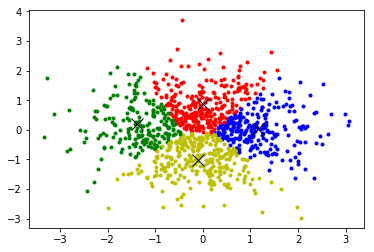

In [29]:
#BOF
def kmeans(table,K):
    centroids_old = [0]*K
    centroids_new = [] #<- k long
    i = 0
    for i in range(K):
        j = random.randint(0,len(table))
        centroids_new.append(list(table.loc[j]))
    Num_of_it = 0
    while centroids_old != centroids_new:
        Num_of_it += 1
        centroids_old = centroids_new
        classLabels = []
        for i in range(len(data)):
            distances = []
            for j in range(len(centroids_new)):
                distances.append(dist(list(data.iloc[i]), centroids_new[j]))
            min_dist = min(distances)
            classLabels.append(distances.index(min_dist))
        centroids_new = []
        for label in set(classLabels):
            total = [0]*len(list(table.loc[1]))
            count = 0
            for k in range(len(classLabels)):
                if classLabels[k] == label:
                    value = list(data.loc[k])
                    for i in range(len(total)):
                        total[i] += value[i]
                    count += 1
            centroid = [total[i]/count for i in range(len(total))]
            centroids_new.append(centroid)
    return(classLabels,centroids_new, Num_of_it)

classLabels, centroids_new, Num_of_it = kmeans(data,4)
print(centroids_new)
#plotting only suitable for 2 dimensions!
cols=["r","g","b","y","m","c","k"]
for i in range(len(data)):
    plot(data["A"][i],data["B"][i],"."+cols[classLabels[i]])
for i in range(len(centroids_new)):
    plot([centroids_new[i][0]],[centroids_new[i][1]], "x", markersize = 12, color = "k")

print(Num_of_it)    
#EOF

[[-0.87387242813082888, -1.0093679471095545], [-0.75616297153525325, 0.63243999229297343], [-1.8369225938610172, 0.0005764338019501197], [0.57896743646399196, -0.043644131786011155]]
1


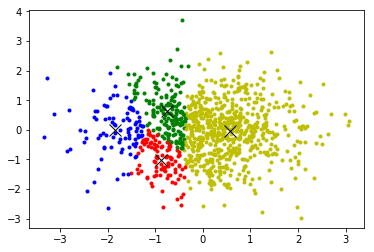

In [33]:
def kmeans(table,K):
    centroids_old = [0]*K
    centroids_new = [] #<- k long
    i = 0
    for i in range(K):
        j = random.randint(0,len(table))
        centroids_new.append(list(table.loc[j]))
    counter = 0
    while counter < 1:
        counter += 1
        centroids_old = centroids_new
        classLabels = []
        for i in range(len(data)):
            distances = []
            for j in range(len(centroids_new)):
                distances.append(dist(list(data.iloc[i]), centroids_new[j]))
            min_dist = min(distances)
            classLabels.append(distances.index(min_dist))
        centroids_new = []
        for label in set(classLabels):
            total = [0]*len(list(table.loc[1]))
            count = 0
            for k in range(len(classLabels)):
                if classLabels[k] == label:
                    value = list(data.loc[k])
                    for i in range(len(total)):
                        total[i] += value[i]
                    count += 1
            centroid = [total[i]/count for i in range(len(total))]
            centroids_new.append(centroid)
    return(classLabels,centroids_new, counter)

classLabels, centroids_new, counter = kmeans(data,4)
print(centroids_new)
#plotting only suitable for 2 dimensions!
cols=["r","g","b","y","m","c","k"]
for i in range(len(data)):
    plot(data["A"][i],data["B"][i],"."+cols[classLabels[i]])
for i in range(len(centroids_new)):
    plot([centroids_new[i][0]],[centroids_new[i][1]], "x", markersize = 12, color = "k")

print(counter)    
#EOF

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
DF=pd.read_csv('pitching.csv')
df=DF.loc[(DF['yearID'] == 2017) & (DF['lgID']=='AL')&(DF['G']>=10)]
df
#df.plot(x='ERA',y='W',style='o')
#scatter()

fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
x=df['ERA']
y=df['W']
z=df['SO']

ax.scatter3D(x,y,z)

NameError: name 'os' is not defined

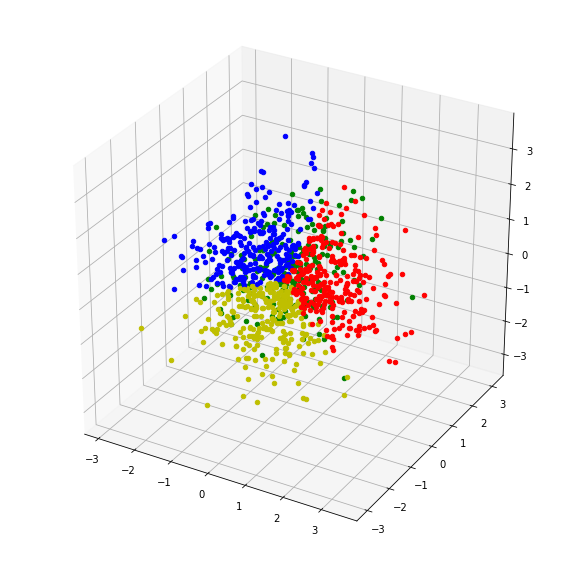

In [8]:
def kmeans(table,K):
    centroids_old = [0]*K
    centroids_new = [] #<- k long
    i = 0
    for i in range(K):
        j = random.randint(0,len(table))
        centroids_new.append(list(table.loc[j]))
    Num_of_it = 0
    while centroids_old != centroids_new:
        Num_of_it += 1
        centroids_old = centroids_new
        classLabels = []
        for i in range(len(data)):
            distances = []
            for j in range(len(centroids_new)):
                distances.append(dist(list(data.iloc[i]), centroids_new[j]))
            min_dist = min(distances)
            classLabels.append(distances.index(min_dist))
        centroids_new = []
        for label in set(classLabels):
            total = [0]*len(list(table.loc[1]))
            count = 0
            for k in range(len(classLabels)):
                if classLabels[k] == label:
                    value = list(data.loc[k])
                    for i in range(len(total)):
                        total[i] += value[i]
                    count += 1
            centroid = [total[i]/count for i in range(len(total))]
            centroids_new.append(centroid)
    return(classLabels,centroids_new, Num_of_it)

classLabels, centroids_new, Num_of_it = kmeans(data,4)
cols=["r","g","b","y","m","c","k"]
fig=plt.figure(figsize=(10,10))
x=data["A"]
y=data["B"]
z=data["C"]
ax=plt.axes(projection='3d')
for i in range(len(data)):
    ax_plot = ax.scatter3D(x.iloc[i],y.iloc[i],z.iloc[i], c = cols[classLabels[i]])
